In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
# Read Recon pathways reactions from RECON3 subsystems
pathway_df = pd.read_csv('RECON_Pathway_Reactions.csv')
pathway_df.head()
pathway_df_unq = pathway_df.groupby(['Var1']).agg(['count'])
pathway_df_unq.columns

MultiIndex([('Var2', 'count')],
           )

In [5]:
pathway_df.head()

,Var1,Var2
0,"Transport, lysosomal","5-Glutamyl-10Fthf Transport, Lysosomal"
1,"Transport, mitochondrial","5-Glutamyl-10Fthf Transport, Mitochondrial"
2,"Transport, lysosomal","6-Glutamyl-10Fthf Transport, Lysosomal"
3,"Transport, mitochondrial","6-Glutamyl-10Fthf Transport, Mitochondrial"
4,"Transport, lysosomal","7-Glutamyl-10Fthf Transport, Lysosomal"


In [6]:
der_df = pd.read_csv('./data/severity_study/Differentially_Expressed_Reactions.csv')
der_df.iloc[:,1] = der_df.iloc[:,1]*-1
der_df.head()

,Pathway,Down_regulated,Up_regulated,Phenotype
0,Arginine and proline metabolism,0,2,Series1
1,Chondroitin synthesis,0,1,Series1
2,Oxidative phosphorylation,1,0,Series1
3,Urea cycle,0,1,Series1
4,Alanine and aspartate metabolism,2,1,Series16


In [7]:
# Conditions with metabolic DER
der_df.Phenotype.unique()

array(['Series1', 'Series16', 'Series5', 'Series6', 'Series7'],
      dtype=object)

In [8]:
der_df.shape

(245, 4)

In [9]:
der_df = der_df.loc[np.logical_or(der_df.iloc[:,1]>3,der_df.iloc[:,2]>3),:]
# Calculate the percentage of rxns in a pathway
for i in range(der_df.shape[0]):
    pathway = der_df.iloc[i,0]
    rxns_count = int(pathway_df_unq.loc[pathway,:].values)
    der_df.iloc[i,1] = der_df.iloc[i,1]/rxns_count
    der_df.iloc[i,2] = der_df.iloc[i,2]/rxns_count

In [10]:
der_df.shape

(102, 4)

In [11]:
der_df.Pathway.unique()

array(['Aminosugar metabolism',
       'Androgen and estrogen synthesis and metabolism',
       'Arachidonic acid metabolism', 'Bile acid synthesis',
       'Cholesterol metabolism', 'Chondroitin sulfate degradation',
       'Chondroitin synthesis', 'Drug metabolism',
       'Eicosanoid metabolism', 'Fatty acid oxidation',
       'Fatty acid synthesis', 'Folate metabolism',
       'Fructose and mannose metabolism', 'Galactose metabolism',
       'Glutathione metabolism', 'Glycerophospholipid metabolism',
       'Glycolysis/gluconeogenesis', 'Glycosphingolipid metabolism',
       'Glyoxylate and dicarboxylate metabolism',
       'Heparan sulfate degradation', 'Inositol phosphate metabolism',
       'Keratan sulfate degradation', 'Keratan sulfate synthesis',
       'Lysine metabolism', 'Methionine and cysteine metabolism',
       'Miscellaneous', 'NAD metabolism', 'Nucleotide interconversion',
       'Oxidative phosphorylation', 'Pentose phosphate pathway',
       'Phenylalanine metaboli

In [12]:
der_df = der_df.loc[np.logical_or(der_df.iloc[:,1]>0.05,der_df.iloc[:,2]>0.05),:]

In [13]:
der_df.shape

(91, 4)

In [14]:
der_df

,Pathway,Down_regulated,Up_regulated,Phenotype
5,Aminosugar metabolism,0.187500,0.000000,Series16
6,Androgen and estrogen synthesis and metabolism,0.423077,0.000000,Series16
7,Arachidonic acid metabolism,0.170732,0.000000,Series16
10,Bile acid synthesis,0.318919,0.005405,Series16
13,Chondroitin sulfate degradation,0.545455,0.000000,Series16
...,...,...,...,...
224,Phenylalanine metabolism,0.194444,0.000000,Series7
225,Phosphatidylinositol phosphate metabolism,0.175000,0.000000,Series7
229,Pyruvate metabolism,0.093750,0.125000,Series7
230,Sphingolipid metabolism,0.075188,0.007519,Series7


In [15]:
der_down = der_df.pivot_table(values='Down_regulated',index='Pathway', columns='Phenotype',aggfunc='mean',fill_value=None,dropna=False)
der_up = der_df.pivot_table(values='Up_regulated',index='Pathway', columns='Phenotype',aggfunc='mean',fill_value=None,dropna=False)
der_down = der_down.fillna(0)
der_up = der_up.fillna(0)


In [16]:
der_up.head(2)

Phenotype,Series16,Series5,Series6,Series7
Pathway,,,,
Aminosugar metabolism,0.0,0.0,0.0,0.0
Androgen and estrogen synthesis and metabolism,0.0,0.0,0.0,0.0


In [17]:
der_down.shape

(45, 4)

In [18]:
der_up = der_up.loc[:,['Series16', 'Series5', 'Series6', 'Series7']]
der_down = der_down.loc[:,['Series16', 'Series5', 'Series6', 'Series7']]
der_up.columns = ['A549_2_ACE2', 'A549_2','A549_0.2_ACE2','Calu3_2']
der_down.columns = ['A549_2_ACE2', 'A549_2','A549_0.2_ACE2','Calu3_2']
#['A549_2_ACE2', 'A549_2','A549_0.2_ACE2','Calu3_2']

#['A549_0.2_ACE2',  'A549_2','A549_2_ACE2','Calu3_2']
#['Series6', 'Series5', 'Series16', 'Series7']
df_final = der_down.merge(der_up,on='Pathway')

In [19]:
columns = df_final.columns
columns = [x.replace('_x','') for x in columns]
columns = [x.replace('_y','') for x in columns]
df_final.index.name = ''
df_final.columns = columns

In [20]:
df_final.columns

Index(['A549_2_ACE2', 'A549_2', 'A549_0.2_ACE2', 'Calu3_2', 'A549_2_ACE2',
       'A549_2', 'A549_0.2_ACE2', 'Calu3_2'],
      dtype='object')

In [21]:
#df_final.columns = ['A549_2_ACE2_down', 'A549_2_down','A549_0.2_ACE2_down','Calu3_2_down',
#                    'A549_2_ACE2_up', 'A549_2_up','A549_0.2_ACE2_up','Calu3_2_up']

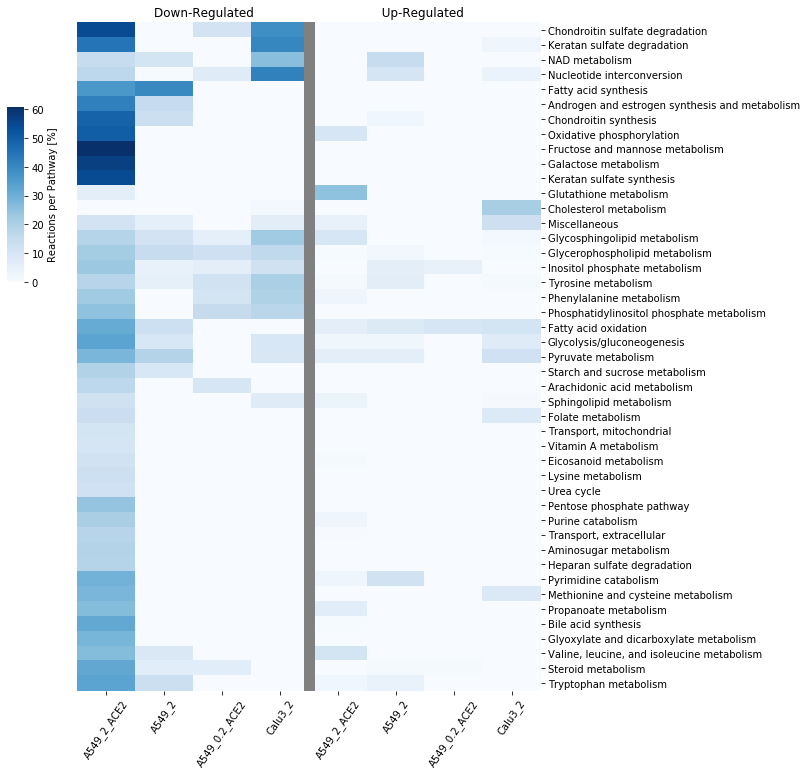

In [22]:
g = sns.clustermap(df_final*100,col_cluster=False,row_cluster=True,mask=False,
                   #standard_scale=0,
                   cmap="Blues",
                   cbar_kws={'label':'Reactions per Pathway [%]'},#,"orientation": "horizontal"},
                   cbar_pos=(0.07, .5, .02, .2),
                   #square=True,
                   figsize=(12,(.27*(len(df_final.index))))#,
                   #dendrogram_ratio=(.1, .2),
                  )
#g.cax.set_visible(True)
#l2=g.ax_heatmap.legend(loc='center left',bbox_to_anchor=(1.01,0.85),handles=legend_TN,frameon=True)
#l2.set_title(title='tissue type',prop={'size':10})
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=55)
g.ax_heatmap.axvline(4, 0, 1, linewidth=11, c='grey')
g.ax_heatmap.set_title('Down-Regulated                                 Up-Regulated')

# set title and set font of title
#ax.set_title("Number of traffic accidents per day & hour combination", fontsize=30, fontweight="bold")
#plt.legend(handles, lut, title='Species',           bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper right')
g.savefig('Figs/Differentially_Expressed_Reactions_All_Sorted.svg', dpi=400,bbox_inches='tight')
g.savefig('Figs/Differentially_Expressed_Reactions_All_Sorted.png', dpi=400,bbox_inches='tight')